In [133]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
import os.path
from bs4 import BeautifulSoup
import requests
import wfdb

In [2]:
record_segment_good_length_path = '../../../2_data/'

In [3]:
!ls -l $record_segment_good_length_path

total 15048
-rw-r--r--  1 tarus  staff   813960 Jan 16 13:33 record_path_mimic3.csv
-rw-r--r--  1 tarus  staff   825729 Jan 31 16:13 record_path_mimic3_matched.csv
-rw-r--r--  1 tarus  staff   149932 Feb  1 12:24 record_segment_good_length_0_1999.csv
-rw-r--r--  1 tarus  staff  1354163 Feb  1 19:44 record_segment_good_length_10000_14999.csv
-rw-r--r--  1 tarus  staff  1299122 Feb  1 21:11 record_segment_good_length_15000_19999.csv
-rw-r--r--  1 tarus  staff   250686 Feb  1 21:51 record_segment_good_length_20000_22317.csv
-rw-r--r--  1 tarus  staff   196239 Feb  1 13:34 record_segment_good_length_2000_3999.csv
-rw-r--r--  1 tarus  staff   217590 Feb  1 16:42 record_segment_good_length_4000_5999.csv
-rw-r--r--  1 tarus  staff   461693 Feb  1 17:20 record_segment_good_length_6000_7999.csv
-rw-r--r--  1 tarus  staff   437469 Feb  1 17:56 record_segment_good_length_8000_9999.csv


In [7]:
first_record = 0
last_record = 1999
record_list_file = record_segment_good_length_path + 'record_segment_good_length_' + str(first_record) + '_' + str(last_record) + '.csv'
print('record_list_file: {}'.format(record_list_file))

record_list_file: ../../../2_data/record_segment_good_length_0_1999.csv


In [8]:
!ls -l $record_list_file

-rw-r--r--  1 tarus  staff  149932 Feb  1 12:24 ../../../2_data/record_segment_good_length_0_1999.csv


In [65]:
segment_list_1 = pd.read_csv(record_list_file, header=None)

In [74]:
segment_list_1.head()

,1,2
0,10,p00/p000107/3860035_0001
1,10,p00/p000107/3860035_0004
2,10,p00/p000107/3860035_0006
3,10,p00/p000107/3860035_0009
4,10,p00/p000107/3860035_0010


In [73]:
# drop the first column
segment_list_1.drop(segment_list_1.columns[[0]], axis=1, inplace=True)

In [80]:
segment_list_1.head()

,1,2
0,10,p00/p000107/3860035_0001
1,10,p00/p000107/3860035_0004
2,10,p00/p000107/3860035_0006
3,10,p00/p000107/3860035_0009
4,10,p00/p000107/3860035_0010


In [83]:
record_list_1 = segment_list_1.groupby(segment_list_1.iloc[:,0],as_index=False).agg(list)

In [84]:
record_list_1.head()

,1,2
0,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[p00/p000107/3860035_0001, p00/p000107/3860035..."
1,"[11, 11, 11, 11, 11, 11, 11, 11]","[p00/p000107/3746356_0006, p00/p000107/3746356..."
2,"[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2...","[p00/p000124/3931528_0006, p00/p000124/3931528..."
3,"[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 2...","[p00/p000124/3776642_0006, p00/p000124/3776642..."
4,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[p00/p000124/3644535_0001, p00/p000124/3644535..."


In [85]:
record_list_1.shape

(332, 2)

In [88]:
record_list_1.iloc[0,0][0]

10

In [90]:
for root in record_list_1.iloc[0,1]:
    print(root)
    

p00/p000107/3860035_0001
p00/p000107/3860035_0004
p00/p000107/3860035_0006
p00/p000107/3860035_0009
p00/p000107/3860035_0010
p00/p000107/3860035_0011
p00/p000107/3860035_0012
p00/p000107/3860035_0014
p00/p000107/3860035_0016
p00/p000107/3860035_0022
p00/p000107/3860035_0024
p00/p000107/3860035_0029
p00/p000107/3860035_0031
p00/p000107/3860035_0032
p00/p000107/3860035_0034
p00/p000107/3860035_0037
p00/p000107/3860035_0040
p00/p000107/3860035_0044


In [97]:
root_list = [x.split('/') for x in record_list_1.iloc[0,1]]
root_list

[['p00', 'p000107', '3860035_0001'],
 ['p00', 'p000107', '3860035_0004'],
 ['p00', 'p000107', '3860035_0006'],
 ['p00', 'p000107', '3860035_0009'],
 ['p00', 'p000107', '3860035_0010'],
 ['p00', 'p000107', '3860035_0011'],
 ['p00', 'p000107', '3860035_0012'],
 ['p00', 'p000107', '3860035_0014'],
 ['p00', 'p000107', '3860035_0016'],
 ['p00', 'p000107', '3860035_0022'],
 ['p00', 'p000107', '3860035_0024'],
 ['p00', 'p000107', '3860035_0029'],
 ['p00', 'p000107', '3860035_0031'],
 ['p00', 'p000107', '3860035_0032'],
 ['p00', 'p000107', '3860035_0034'],
 ['p00', 'p000107', '3860035_0037'],
 ['p00', 'p000107', '3860035_0040'],
 ['p00', 'p000107', '3860035_0044']]

In [99]:
# get the Intermediate directory 
intermediate_directory = root_list[0][0]
intermediate_directory

'p00'

In [129]:
# get the directory
directory = root_list[0][0] + '/' + root_list[0][1] + '/'
directory

'p00/p000107/'

In [105]:
# get the user_id
user_id = root_list[0][1][1:]
int(user_id)

107

In [134]:
record_segment = [x[2] for x in root_list]
record_segment

['3860035_0001',
 '3860035_0004',
 '3860035_0006',
 '3860035_0009',
 '3860035_0010',
 '3860035_0011',
 '3860035_0012',
 '3860035_0014',
 '3860035_0016',
 '3860035_0022',
 '3860035_0024',
 '3860035_0029',
 '3860035_0031',
 '3860035_0032',
 '3860035_0034',
 '3860035_0037',
 '3860035_0040',
 '3860035_0044']

In [135]:
random.Random(4).shuffle(record_segment)
record_segment

['3860035_0031',
 '3860035_0037',
 '3860035_0011',
 '3860035_0040',
 '3860035_0016',
 '3860035_0034',
 '3860035_0010',
 '3860035_0032',
 '3860035_0001',
 '3860035_0024',
 '3860035_0004',
 '3860035_0006',
 '3860035_0044',
 '3860035_0012',
 '3860035_0029',
 '3860035_0009',
 '3860035_0022',
 '3860035_0014']

In [136]:
record_segment_path = 'https://physionet.org/content/mimic3wdb-matched/1.0/' + directory + waveform_record_segment[0] + '.dat'
record_segment_path

'https://physionet.org/content/mimic3wdb-matched/1.0/p00/p000107/3860035_0031.dat'

In [139]:
record_segment_signal = wfdb.rdsamp(record_name=record_segment[0],
                                    pn_dir='mimic3wdb-matched/1.0/' + directory,
                                    channel_names=['PLETH'])

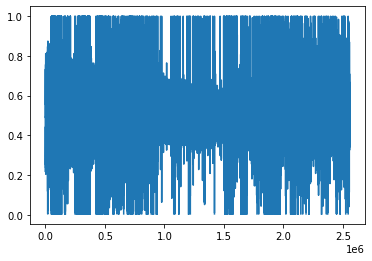

In [140]:
# Plotting the signal
plt.figure()
plt.plot(record_segment_signal[0])
plt.show()        

In [141]:
type(record_segment_signal)

tuple

In [143]:
len(record_segment_signal)

2

In [144]:
record_segment_signal

(array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.50588235],
        [0.52156863],
        [0.53333333]]),
 {'fs': 125,
  'sig_len': 2558375,
  'n_sig': 1,
  'base_date': None,
  'base_time': datetime.time(14, 27, 7),
  'units': ['NU'],
  'sig_name': ['PLETH'],
  'comments': []})